## Ctagorical input and Catgorical output
### here we will use mutual info class from sklear which uses information gain to calculate importantces

In [17]:
import pandas as pd
pd.set_option('display.max_columns',None)
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('../../Exlr_Assignments/Datasets/Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
del data['animal name']

In [5]:
data.fins.unique()

array([0, 1])

In [6]:
data.catsize.unique()

array([1, 0])

In [7]:
data.legs.unique()

array([4, 0, 2, 6, 8, 5])

In [14]:
data = pd.get_dummies(data=data,columns=['legs'],drop_first=True)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,type,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,4,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,1,0,1,0,0,0


In [15]:
X = data.drop(labels='type',axis=1)
y = data['type']

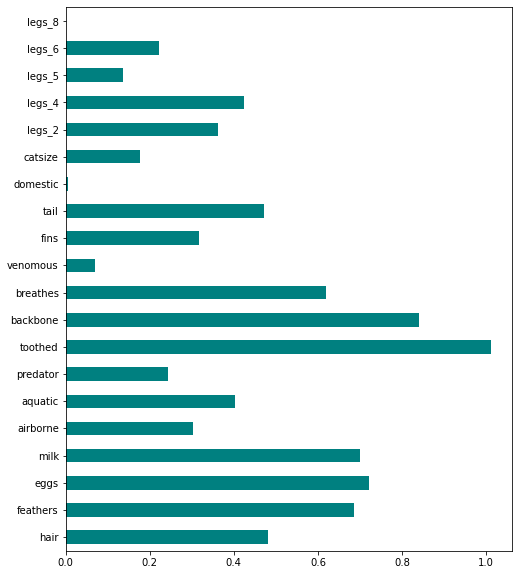

In [19]:
plt.figure(figsize=(8,10))
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,X.columns)
feat_importances.plot(kind='barh',color='teal')
plt.show()

## above plot shows that domestic and leg_8 features are insignificant and can be dropped